In [20]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import orthopy
import scipy
from scipy.special import binom,legendre
from scipy.integrate import quad
import matplotlib.pyplot as plt

The notation is completely confused. Let's try to unify it. Consider the method
$$
x_{t+1}=x_t+m_t(x_t-x_{t-1})+h_t\nabla f(x_t)
$$

This leads to the recurrence:
$$
P_{t+1}(\lambda)=a_tP_t(\lambda)+b_t\lambda P_t(\lambda)+(1-a_t)P_{t-1}(\lambda)
$$
Withc $m_t=a_t-1$ and $h_t=b_t$.

The notation used for the monic polynomials in the transforms is:
$$
xP_t(x)=P_{t+1}(x)+\beta_tP_t(x)+\gamma_tP_{t-1}(x)
$$

While the one from Fabian and Damien's is:
$$
Q_t(\lambda)=\lambda Q_{t-1}(\lambda)+\alpha'_tQ_{t-1}(\lambda)+\gamma'_tQ_{t-2}(\lambda)
$$
Thus $(\alpha'_t,\gamma'_t)=-(\beta_t,\gamma_t)$
We'll work with residual notation as in Fabian's and monic as in the transforms paper

In [17]:
def darboux(beta,gamma):
    ##we cant compute (J^p)_n with only J_n, we need an extra element of gamma
    ##We that is, we lose one dimension per darboux
    assert len(beta)==len(gamma)
    l=[gamma[0]/beta[0]]
    u=[beta[0]]
    for g,b in zip(gamma[1:],beta[1:]): l.append(g/(b-l[-1]))
    l=np.array(l)
    u=np.concatenate([np.array([beta[0]]),l[:-1]-beta[:-1]])
    
    
    return u+l,u[1:]*l[1:]

def to_monic(alpha,beta,gamma):
    ##entries as in Apendix B.2 Pedregosa,Scieur
    ##returns beta, gamma as in darboux input
    ##
    assert len(beta)==len(alpha)==len(gamma)+1
    beta2=alpha/beta
    g=gamma/beta[1:]/beta[:-1]
    
    return beta2,g
def shift(alpha,beta,a,b):
    ##recurrence coefficients for p_n(x) =u_n(ax+b)
    return alpha*a,beta+a*alpha 
    

def to_residual(alpha,beta,gamma):
    ##entries and returns as in Apendix B.2 Pedregosaur
    assert len(beta)==len(alpha)==len(gamma)+1
    gamma=np.concatenate([np.array([0]),gamma])
    a_ls,b_ls=[],[]
    delta=0
    for alpha_,beta_,gamma_ in zip(alpha,beta,gamma):
        delta=1/(alpha_+gamma_*delta)
        a_ls.append(delta*alpha_)
        b_ls.append(delta*beta_)
        
    return np.array(a_ls),np.array(b_ls)
    
    
def pdarboux(beta,gamma,s):
    u=[s]
    for g,b in zip(gamma,beta): u.append(g/(b-u[-1]))
    u=np.array(u)
    l=beta-u
    
    beta2=np.concatenate([np.array([u[0]]),u[1:]+l[:-1]])
    return beta2,u*l

def uvarov(gamma,beta,mrfracmu,x):
    b2,g2=darboux(beta-x,gamma)
    s=(beta[0]-x)/(mrfracmu+1)
    b3,g3=pdarboux(b2,g2,s)
    
    return b3+x,g3


def jacobi_momentum(niter=200,b=2,L=4):
    """
    recurrence coefficients for $\lambda^{b+1}d\mu_{MP,L}$
    """
    delta=0
    a_ls,b_ls=[],[]
    for t in range(1,niter+1):
        t2=t**2
        alpha=-(b+2*t)*(2*b**2+4*b*t+b+4*t2-1)
        alpha/=2*t*(b+t+1)*(b+2*t-1)
        
        beta=(b+2*t)*(b+2*t+1)/(L*t*(b+t+1))
        
        gamma=-(t-1/2)*(b+t-1/2)*(b+2*t+1)
        gamma/=t*(b+t+1)*(b+2*t-1)
        
        delta=1/(alpha+gamma*delta)
        
        a,bt=delta*alpha,delta*beta
        a_ls.append(a)
        b_ls.append(bt)
    return np.array(a_ls),np.array(b_ls)

def christoffel(beta,gamma,x0):
    beta-=x0
    beta,gamma=darboux(beta,gamma)
    return beta+x0,gamma

eta=0.1
alpha0,beta0=jacobi_momentum(b=1)
gamma=1-alpha0[1:]
beta1,gamma1=to_monic(alpha0,beta0,gamma)
beta1,gamma1=christoffel(beta1[:-1],gamma1,-eta)
alpha1,gamma1=-beta1,-gamma1 ##change notations
afinal,bfinal=to_residual(alpha1,np.ones(len(alpha1)),gamma1)


Let  $X_n\in\mathcal{R}^{N\times n}$

In [18]:
class 

class RandomQuadratic:
    def __init__(self,r=1,sigma=1,n=600,theta=0):
        m=int(n*r)
        X=np.random.normal(size=(m,n),scale=sigma)
        
        self.A=1/n*(X@X.T)
        self.x0=np.random.normal(size=(m,1))
        self.L=eigh(self.A,eigvals_only=True,subset_by_index=[m-1,m-1])
        
        
    def plot(self):
        ev,_=np.linalg.eigh(self.A)
        plt.hist(ev[ev<100],bins=30)
        plt.show()
    
    def __call__(self,x):
        return 1/2* x.T@self.A@x
    
    def grad(self,x):
        return self.A@x


array([-0.4       , -0.53571429, -0.62222222, -0.68181818, -0.72527473,
       -0.75833333, -0.78431373, -0.80526316, -0.82251082, -0.83695652,
       -0.84923077, -0.85978836, -0.86896552, -0.87701613, -0.88413547,
       -0.89047619, -0.89615932, -0.90128205, -0.90592334, -0.91014799,
       -0.91400966, -0.91755319, -0.92081633, -0.92383107, -0.92662474,
       -0.92922078, -0.93163944, -0.93389831, -0.93601269, -0.93799603,
       -0.93986014, -0.94161545, -0.94327122, -0.94483568, -0.94631618,
       -0.9477193 , -0.94905095, -0.95031646, -0.95152063, -0.95266781,
       -0.95376197, -0.95480669, -0.95580524, -0.95676063, -0.95767559,
       -0.95855263, -0.95939407, -0.96020202, -0.96097845, -0.96172517,
       -0.96244385, -0.96313603, -0.96380317, -0.96444659, -0.96506754,
       -0.96566717, -0.96624656, -0.96680672, -0.9673486 , -0.96787307,
       -0.96838095, -0.96887303, -0.96935003, -0.96981263, -0.97026147,
       -0.97069717, -0.97112028, -0.97153135, -0.97193088, -0.97

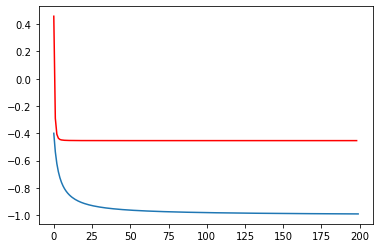

In [19]:
plt.plot(bfinal,c='r')
plt.plot(beta0)

What's the optimal method for $(1-c) \mathcal{MP}(r,\sigma^2) +c\delta_a$?

In [73]:
c=0.05
a=2
r,sigma2=0.5,1
beta,gamma=jacobi_MP(r,sigma2)


beta,gamma=uvarov(gamma,beta[:-1],c/(1-c),a)
beta,gamma=darboux(beta,gamma)
alpha=np.ones(len(beta))
a,b=to_residual(alpha,-beta,-gamma)
a,b

(array([1.        , 1.03568542, 1.44656694, 1.33745058, 1.51086316,
        1.60675195, 1.67137439, 1.71775131, 1.75265738, 1.77987992,
        1.80170434, 1.81959146, 1.83451859, 1.84716432, 1.85801454,
        1.86742631, 1.87566789, 1.88294476, 1.88941692, 1.89521087,
        1.90042791, 1.90515011, 1.90944469, 1.91336722, 1.91696404,
        1.9202741 , 1.92333037, 1.92616098, 1.92879002, 1.93123828,
        1.93352379, 1.93566225, 1.93766742, 1.93955138, 1.9413248 ,
        1.94299713, 1.94457677, 1.94607122, 1.9474872 , 1.94883072,
        1.95010721, 1.95132156, 1.9524782 , 1.95358116, 1.95463407,
        1.95564028, 1.95660283, 1.95752448, 1.95840781, 1.95925514,
        1.96006864, 1.96085029, 1.96160193, 1.96232525, 1.96302182,
        1.9636931 , 1.96434045, 1.96496511, 1.96556827, 1.96615101,
        1.96671435, 1.96725925, 1.96778659, 1.96829722, 1.96879191,
        1.9692714 , 1.96973638, 1.9701875 , 1.97062536, 1.97105055,
        1.97146361, 1.97186504, 1.97225534, 1.97

In [34]:
def mp_moments(rho,sigma2=0.5,N=100): ##wrong recursion
    sigrho=sigma2
    mus=[sigrho]
    for r in range(1,N):
        sigrho*=sigma2*rho
        mus.append(sigma2*r*(r+1)*mus[-1]+sigrho)
        
    return np.asarray(mus)

def _moments(rho,sigma2=0.5,N=100):
    mus=[]
    for r in range(1,N+1):
        sigr=sigma2**r
        mur=0
        for k in range(r):
            mur+=sigr*(rho**k)*binom(r,k)*binom(r-1,k)/(k+1)
        mus.append(mur)
    return np.asarray(mus)
 
_moments(0.5,0.1,200)      
    

array([1.00000000e-001, 1.50000000e-002, 2.75000000e-003, 5.62500000e-004,
       1.23125000e-004, 2.82187500e-005, 6.68593750e-006, 1.62445313e-006,
       4.02535156e-007, 1.01339648e-007, 2.58469043e-008, 6.66448682e-009,
       1.73435969e-009, 4.54948143e-010, 1.20166108e-010, 3.19323070e-011,
       8.53103836e-012, 2.29003469e-012, 6.17356170e-013, 1.67070573e-013,
       4.53708912e-014, 1.23603791e-014, 3.37710780e-015, 9.25151566e-016,
       2.54064627e-016, 6.99290854e-017, 1.92877568e-017, 5.33029665e-018,
       1.47573709e-018, 4.09262984e-019, 1.13680168e-019, 3.16237230e-020,
       8.80944372e-021, 2.45728604e-021, 6.86281429e-022, 1.91892646e-022,
       5.37151276e-023, 1.50519192e-023, 4.22202543e-024, 1.18539193e-024,
       3.33115820e-025, 9.36919247e-026, 2.63733561e-026, 7.42965878e-027,
       2.09458280e-027, 5.90931762e-028, 1.66830365e-028, 4.71301132e-029,
       1.33228116e-029, 3.76839487e-030, 1.06652188e-030, 3.02013466e-031,
       8.55690843e-032, 2

In [39]:
m=_moments(0.5,0.1,50)
beta,gamma,_=orthopy.tools.chebyshev(m)
orthopy.tools.gautschi_test_3(m,beta,gamma)

#a1,a2=jacobi_MP(0.5,1,10)
#print(a1,a2)
#print(n1)

C:\Users\leona\anaconda3\lib\site-packages\orthopy\tools\generate_rc.py:174: RuntimeWarning: invalid value encountered in double_scalars
  errors_beta[k] = abs(beta[k] - D[k + 1] * D[k - 1] / D[k] ** 2)
C:\Users\leona\anaconda3\lib\site-packages\orthopy\tools\generate_rc.py:173: RuntimeWarning: invalid value encountered in double_scalars
  errors_alpha[k] = abs(alpha[k] - (Dp[k + 1] / D[k + 1] - Dp[k] / D[k]))


(array([0.00000000e+00, 0.00000000e+00, 2.10942375e-15, 4.08562073e-14,
        3.37174733e-13, 3.18587379e-11, 5.58711077e-10, 4.23371604e-09,
        6.95288228e-07, 3.50820526e-05, 1.36910700e-03, 8.00656185e-02,
        4.78568848e-02, 6.94537927e-02, 3.57274017e-01, 6.90255337e-01,
        1.08781012e+00,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan]),
 array([           nan, 3.46944695e-18, 7.80625564e-18, 8.47412418e-16,
        5.18855792e-15, 3.32543888e-13, 1.07840100e-11, 7.38041329e-11,
        5.77752431e-09, 3.86876977e-07, 1.64961346e-05, 5.85396956e-04,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan]))

In [ ]:
orthopy.tools.gautschi_test_3()

In [40]:

N = 10


x = sympy.Symbol("x")
evaluator = orthopy.c1.legendre.Eval(x, "monic")
legendre_polys = [sympy.expand(next(evaluator)) for _ in range(2 * N)]

mod_moments = [sympy.integrate(x ** 2 * poly, (x, -1, +1)) for poly in legendre_polys]
print(mod_moments)
print()

rc = orthopy.c1.legendre.RecurrenceCoefficients("monic", symbolic=True)
alpha, beta, int_1 = orthopy.tools.chebyshev_modified(mod_moments, rc)
print(alpha)
print(beta)

[2/3, 0, 8/45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0 0 0 0 0 0 0 0 0 0]
[nan 3/5 4/35 25/63 16/99 49/143 12/65 27/85 64/323 121/399]


In [81]:
from sympy.abc import rho,x,k
N=30
#evaluator = orthopy.c1.legendre.Eval(x, "monic")
#legendre_polys = [sympy.expand(next(evaluator)) for _ in range(2 * N)]
polys=[legendre(n,True) for n in range(2*N)]
rc = orthopy.c1.legendre.RecurrenceCoefficients("monic", symbolic=False)

w=lambdify([x,rho],sympy.sqrt(1-x**2)/(2*sympy.sqrt(rho)*x+1+rho))
#polys=[lambdify(x,p) for p  in legendre_polys]
mod_moments=np.array([quad((lambda x,a:  p(x)*w(x,a)),-1,1,limit=200,args=0.5)[0] for p in polys])
#mod_moments=np.array()
beta,gamma, _ = orthopy.tools.chebyshev_modified(mod_moments, rc)

##we still have to shift these polynomials


In [86]:
coeffs=[rc[i] for i in range(200)]
alpha,beta,gamma=np.array([c[0] for c in coeffs]),np.array([c[1] for c in coeffs]),np.array([c[2] for c in coeffs])


In [27]:
quad

KeyboardInterrupt: 

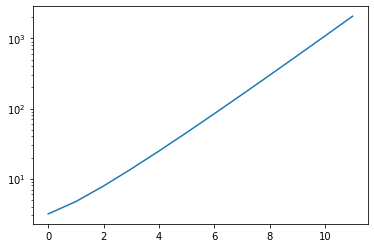

In [44]:
import matplotlib.pyplot as plt
#plt.plot(integs)
plt.semilogy(integs)

In [41]:
from sympy.abc import x,k
integs=[]
for i in range(1,30):
    expr=((1+x)**(i))/sp.sqrt(1-x**2)
    inte=sp.integrals.integrate(expr,(x,-1,1))
    integs.append(float(inte))

KeyboardInterrupt: 

In [39]:
inte.simplify()

63*pi/8

1.4483679868929749


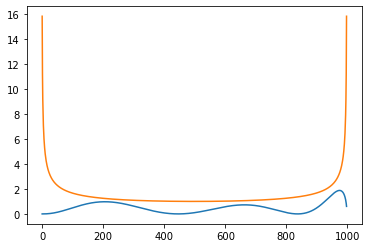

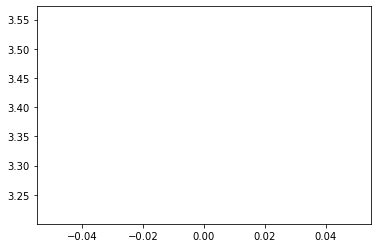

In [1]:
import scipy
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
t=np.linspace(-1,1,1000)
t=t[1:-1]
def jacobi_func(alpha,beta):
    def f(t):
        return ((1-t)**alpha)*((1+t)**beta)
    return f
fdmu= jacobi_func(1/2,5/2)
dmu=fdmu(t)
fs=[]
for n in range(2,3):
    p=scipy.special.jacobi(n,1/2,5/2,False)
    y=p(t)
    ig=(y**2*dmu)
    itl=scipy.integrate.cumtrapz(ig,t)
    print(itl[-1])
    #plt.plot(t[:-1],itl/itl[-1])
    plt.plot((y**2)*dmu/itl[-1])
    aux=1/(np.sqrt(1-t**2))
    plt.plot(aux)
    fs.append(p(-1)**2/itl[-1]**2)
plt.show()
plt.plot(np.log(np.array(fs)))

1.7180584824171259
1.4496118445446726
1.2402234670024987
1.0796588217154253
0.9543412799149205
0.8543784490887532
0.773009072982012
0.7055903839430185
0.6488699448363082
0.6005166556768896
0.5588224423193436
0.5225100713135596
0.490606812150231
0.4623595580680669
0.4371765756021267
0.4145867223944241
0.3942103625854352
0.375738269866962
0.3589160848514665
0.34353270028545263
0.32941146739210725
0.31640345774631595
0.3043822427629113
0.29323980756418616
0.2828833222968047
0.2732325685600649
0.2642178712147463
0.2557784236574318
0.24786092204872834
0.24041844407841362
0.2334095227307775
0.22679737665522745
0.22054926710489917
0.21463595789238485
0.20903125954492183
0.20371164279862597
0.198655909459906
0.19384491088232136
0.1892613062710348
0.18488935437597975
0.18071473332536075
0.17672438424951964
0.17290637513900017
0.16924978191509016
0.1657445842545521
0.16238157406359638
0.1591522748480885
0.1560488705014607
0.15306414224346354
0.15019141265390618
0.14742449586217898
0.144757653170

<ipython-input-12-33d2a94c370b>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  itl,_=scipy.integrate.quad(f,-1,1)
<ipython-input-12-33d2a94c370b>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integ

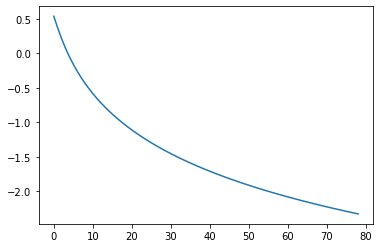

In [12]:
t=np.linspace(-1,1,5000)
t=t[1:-1]
fs=[]
for n in range(1,80):
    p=scipy.special.jacobi(n,1/2,5/2)
    f= lambda x: p(x)**2*fdmu(x)
    itl,_=scipy.integrate.quad(f,-1,1)
    print(itl)
    g=lambda x: f(x)/(1+x)/(itl**2)
    fs.append(scipy.integrate.quad(f,-1,1)[0])
    
#plt.show()
plt.plot(np.log(np.array(fs)))

<ipython-input-14-43c13c67503d>:20: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(a))


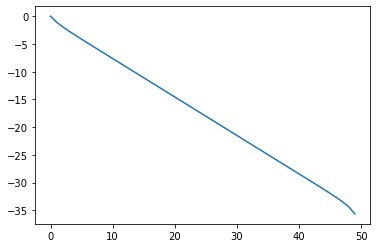

In [14]:

import matplotlib.pyplot as plt 

def mp_rates(sig=1,r=0.5,T=10000):
    rho=(1+r)/np.sqrt(r)
    sum_A=0
    d=-1/rho
    r1=1-1/(sig*(1+r))
    rates=[1,r1]
    A=1.0
    for t in range(2,T):
        d=-1/(rho+d)
        #print(rho,d,-(1+rho*d))
        A*=-(1+rho*d)
        #print(A)
        sum_A+=A
        rates.append(r1+(r1-1)*sum_A)
    return rates
    
a=mp_rates(r=0.5)
plt.plot(np.log(a))     
        